In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("concrete_data.csv")

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


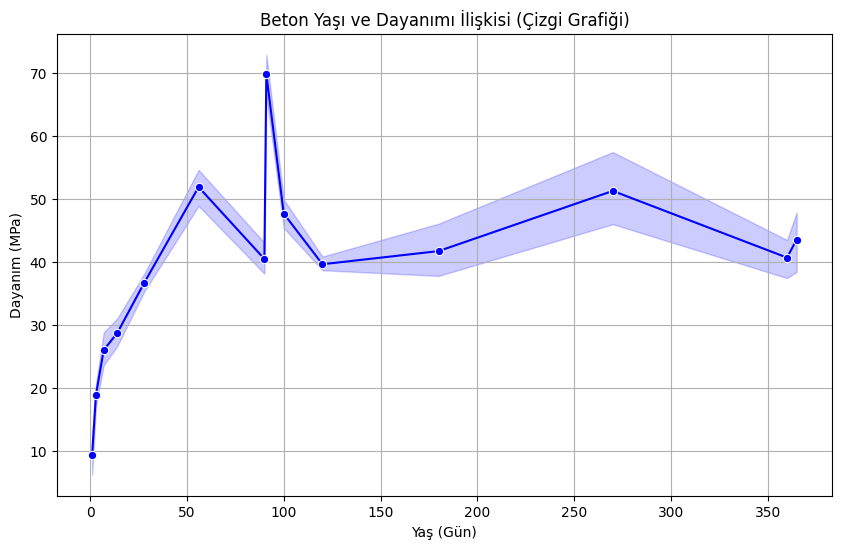

In [9]:
df_sorted = df[['Age', 'Strength']].sort_values(by='Age')

# Çizgi grafiği
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Strength', data=df_sorted, marker='o', color='b')
plt.title('Beton Yaşı ve Dayanımı İlişkisi (Çizgi Grafiği)')
plt.xlabel('Yaş (Gün)')
plt.ylabel('Dayanım (MPa)')
plt.grid(True)
plt.show()

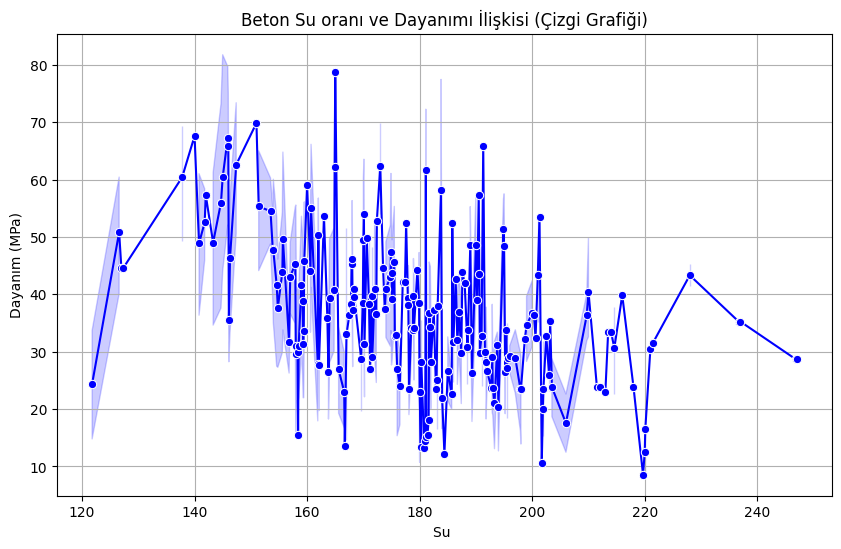

In [14]:
df_sorted = df[['Water', 'Strength']].sort_values(by='Water')

# Çizgi grafiği
plt.figure(figsize=(10, 6))
sns.lineplot(x='Water', y='Strength', data=df_sorted, marker='o', color='b')
plt.title('Beton Su oranı ve Dayanımı İlişkisi (Çizgi Grafiği)')
plt.xlabel('Su ')
plt.ylabel('Dayanım (MPa)')
plt.grid(True)
plt.show()

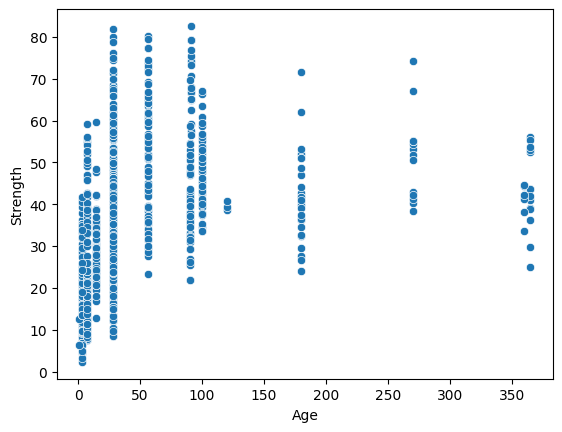

In [15]:
sns.scatterplot(x='Age', y='Strength', data=df)
plt.show()

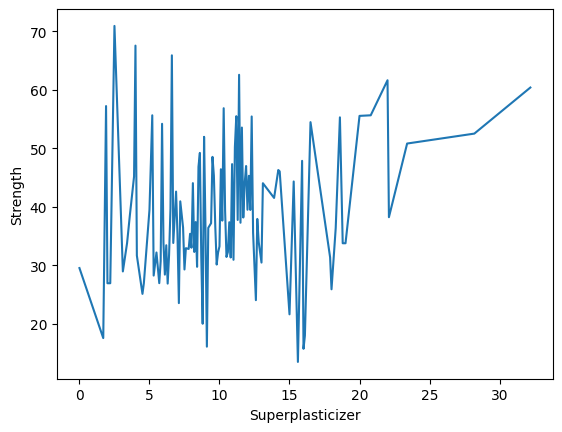

In [17]:
df_sorted = df.groupby('Superplasticizer')['Strength'].mean().reset_index()
sns.lineplot(x='Superplasticizer', y='Strength', data=df_sorted)
plt.show()

In [16]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

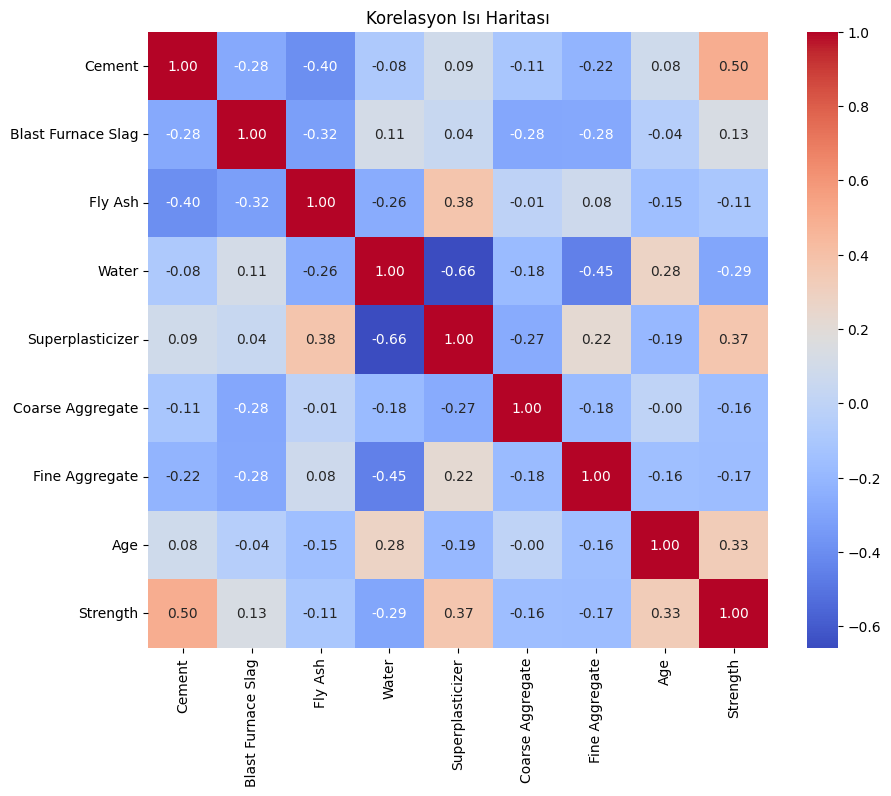

In [18]:
corr = df.corr()
plt.figure(figsize=(10, 8))  # Görseli büyütür
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Isı Haritası")
plt.show()


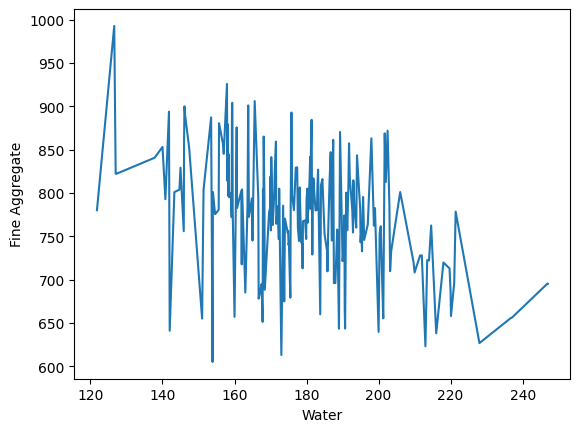

In [20]:
df_sorted = df.groupby('Water')['Fine Aggregate'].mean().reset_index()
sns.lineplot(x='Water', y='Fine Aggregate', data=df_sorted)
plt.show()

In [21]:
X = df.drop("Strength",axis = 1)
y = df["Strength"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=15)


In [23]:
from sklearn.tree import DecisionTreeRegressor
tree_regl = DecisionTreeRegressor(max_depth=3)
tree_regl.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
gbr = GradientBoostingRegressor(n_estimators=3,max_depth=3)

In [26]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=3)

In [28]:
from sklearn.metrics import r2_score

In [29]:
y_pred = gbr.predict(X_test)
r2_score(y_test,y_pred)

0.31671418229216797

In [35]:
from sklearn.model_selection import GridSearchCV


In [36]:
gbr2 = GradientBoostingRegressor(random_state=42)

In [37]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0]
}


In [38]:
grid_search = GridSearchCV(
    estimator=gbr2,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

In [39]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=2)

In [41]:
best_model = grid_search.best_estimator_


In [42]:
y_pred2 = best_model.predict(X_test)


In [43]:

r2_score(y_test,y_pred2)

0.9475595457634581

In [45]:
train_score = grid_search.score(X_train, y_train)
print("Train Accuracy:", train_score)

Train Accuracy: 0.9925776456385511


In [46]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.6}